In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg
import time
from tqdm import trange
import scipy.optimize as sciOp
from scipy.optimize import curve_fit

In [3]:
c1=0.4; c2=1-c1; T21=45; T22=100; T11=600; T12=1200
N=51
t=np.linspace(0,500,N)

TI_star_1=np.log(2)*T11; TI_star_2=np.log(2)*T12
TI_vect=np.linspace(TI_star_1-30, TI_star_1+30, 61)

eval_noise = True
SNR_select = 1000

TI_choice = 200

random_seed = 1

In [4]:
def S_moX_2p(TE, d, T2):
    return d*np.exp(-TE/T2)

def S_moX_3p(T_dat, c, T1, T2):
    TE, TI = T_dat
    return c*(1-2*np.exp(-TI/T1))*np.exp(-TE/T2)

def S_biX_4p(TE, d1, d2, T21, T22):
    exp1 = d1*np.exp(-TE/T21)
    exp2 = d2*np.exp(-TE/T22)
    return exp1 + exp2

def S_biX_6p(TE, TI, c1, c2, T21, T22,  T11, T12):
    exp1 = c1*(1-2*np.exp(-TI/T11))*np.exp(-TE/T21)
    exp2 = c2*(1-2*np.exp(-TI/T12))*np.exp(-TE/T22)
    return exp1 + exp2

In [5]:
def estimate_NLLS(func, tdata, data, init_p, lb, ub):

    popt, pcov = curve_fit(func, tdata, data, bounds = (lb, ub), p0=init_p, maxfev = 4000)
    popt = check_param_order(popt, func)
        
    return popt

def add_noise(data, SNR):
    sigma = 1/SNR #np.max(np.abs(data))/SNR
    noise = np.random.normal(0,sigma,data.shape)
    return data + noise

def set_p0(lb, ub):
    p0 = [np.random.uniform(lb[i],ub[i]) for i in range(len(lb))]
    return p0

def check_param_order(popt, func):
    #Function to automate the order of parameters if desired
    #Reshaping of array to ensure that the parameter pairs all end up in the appropriate place - ensures that T22 > T21
    
    f_name = func.__name__
    num = 0
    if 'off' in f_name:
        num = -1

    if (popt[-2+num] > popt[-1+num]): #We want by convention to make sure that T21 is <= T22
        for i in range(popt.shape[0]//2):
            p_hold = popt[2*i]
            popt[2*i] = popt[2*i+1]
            popt[2*i+1] = p_hold
    return popt


In [6]:
np.random.seed(random_seed)
data_curve = S_biX_6p(t, TI_choice, c1, c2, T21, T22, T11, T12)
if eval_noise:
    data_curve = add_noise(data_curve, SNR_select)

In [7]:
params_test1 = estimate_NLLS(S_moX_2p, t, data_curve, [-.9, 100], [-1,0], [1, 300])

params_test2 = estimate_NLLS(S_moX_2p, t, data_curve, [0.8, 100], [-1,0], [1, 300])

params_test3 = estimate_NLLS(S_moX_2p, t, data_curve, [0.8, 20], [-1,0], [1, 300])

params_test4 = estimate_NLLS(S_moX_2p, t, data_curve, [-.9, 2], [-1,0], [1, 300])

In [8]:
print(f"d1 = {params_test1[0]:0.3f} :: T2 = {params_test1[1]:0.3f}")
print(f"d1 = {params_test2[0]:0.3f} :: T2 = {params_test2[1]:0.3f}")
print(f"d1 = {params_test3[0]:0.3f} :: T2 = {params_test3[1]:0.3f}")
print(f"d1 = {params_test4[0]:0.3f} :: T2 = {params_test4[1]:0.3f}")

d1 = -0.574 :: T2 = 84.303
d1 = -0.574 :: T2 = 84.303
d1 = -0.574 :: T2 = 84.303
d1 = -0.574 :: T2 = 84.303


In [9]:
params_test1 = estimate_NLLS(S_biX_4p, t, data_curve, [-0.5, -0.5, 100, 200], [-1,-1,0,0], [1, 1, 300, 300])

params_test2 = estimate_NLLS(S_biX_4p, t, data_curve, [0, -0.5, 40, 250], [-1,-1,0,0], [1, 1, 300, 300])

params_test3 = estimate_NLLS(S_biX_4p, t, data_curve, [-0.1, 0, 110, 120], [-1,-1,0,0], [1, 1, 300, 300])

params_test4 = estimate_NLLS(S_biX_4p, t, data_curve, [-0.8, 0.8, 30, 120], [-1,-1,0,0], [1, 1, 300, 300])

In [10]:
print(f"d1 = {params_test1[0]:0.3f} :: d2 = {params_test1[1]:0.3f} :: T21 = {params_test1[2]:0.3f} :: T22 = {params_test1[3]:0.3f}")
print(f"d1 = {params_test2[0]:0.3f} :: d2 = {params_test2[1]:0.3f} :: T21 = {params_test2[2]:0.3f} :: T22 = {params_test2[3]:0.3f}")
print(f"d1 = {params_test3[0]:0.3f} :: d2 = {params_test3[1]:0.3f} :: T21 = {params_test3[2]:0.3f} :: T22 = {params_test3[3]:0.3f}")
print(f"d1 = {params_test4[0]:0.3f} :: d2 = {params_test4[1]:0.3f} :: T21 = {params_test4[2]:0.3f} :: T22 = {params_test4[3]:0.3f}")

d1 = -0.182 :: d2 = -0.406 :: T21 = 46.744 :: T22 = 100.781
d1 = -0.182 :: d2 = -0.406 :: T21 = 46.744 :: T22 = 100.781
d1 = -0.182 :: d2 = -0.406 :: T21 = 46.744 :: T22 = 100.781
d1 = -0.852 :: d2 = 0.278 :: T21 = 84.304 :: T22 = 84.304


In [11]:
param_iters = 1000
param_moX_list = np.zeros((param_iters, 2))
init_p_moX_list = np.zeros((param_iters, 2))

param_biX_list = np.zeros((param_iters, 4))
init_p_biX_list = np.zeros((param_iters, 4))

for iP in trange(param_iters):
    init_p_moX_list[iP,:] = set_p0([-1,0], [1, 300])
    param_moX_list[iP,:] = estimate_NLLS(S_moX_2p, t, data_curve, init_p_moX_list[iP,:], [-1,0], [1, 300])

    init_p_biX_list[iP,:] = set_p0([-1,-1,0,0], [1, 1, 300, 300])
    param_biX_list[iP,:] = estimate_NLLS(S_biX_4p, t, data_curve, init_p_biX_list[iP,:], [-1,-1,0,0], [1, 1, 300, 300])

100%|██████████| 1000/1000 [00:12<00:00, 78.73it/s]


In [12]:
print("Variance")
print(f"d1 = {np.var(param_moX_list[:,0]):0.3f} :: T2 = {np.var(param_moX_list[:,1]):0.3f}")
print(f"d1 = {np.var(param_biX_list[:,0]):0.3f} :: d2 = {np.var(param_biX_list[:,1]):0.3f} :: T21 = {np.var(param_biX_list[:,2]):0.3f} :: T22 = {np.var(param_biX_list[:,3]):0.3f}")

print("Range")
print(f"d1 = {np.max(param_moX_list[:,0])- np.min(param_moX_list[:,0]):0.3f} :: T2 = {np.max(param_moX_list[:,1])- np.min(param_moX_list[:,1]):0.3f}")
print(f"d1 = {np.max(param_biX_list[:,0])- np.min(param_biX_list[:,0]):0.3f} :: d2 = {np.max(param_biX_list[:,1])- np.min(param_biX_list[:,1]):0.3f} :: T21 = {np.max(param_biX_list[:,2])- np.min(param_biX_list[:,2]):0.3f} :: T22 = {np.max(param_biX_list[:,3])- np.min(param_biX_list[:,3]):0.3f}")


Variance
d1 = 0.000 :: T2 = 70.101
d1 = 0.043 :: d2 = 0.044 :: T21 = 209.182 :: T22 = 48.478
Range
d1 = 0.013 :: T2 = 84.303
d1 = 1.393 :: d2 = 1.393 :: T21 = 84.283 :: T22 = 100.545


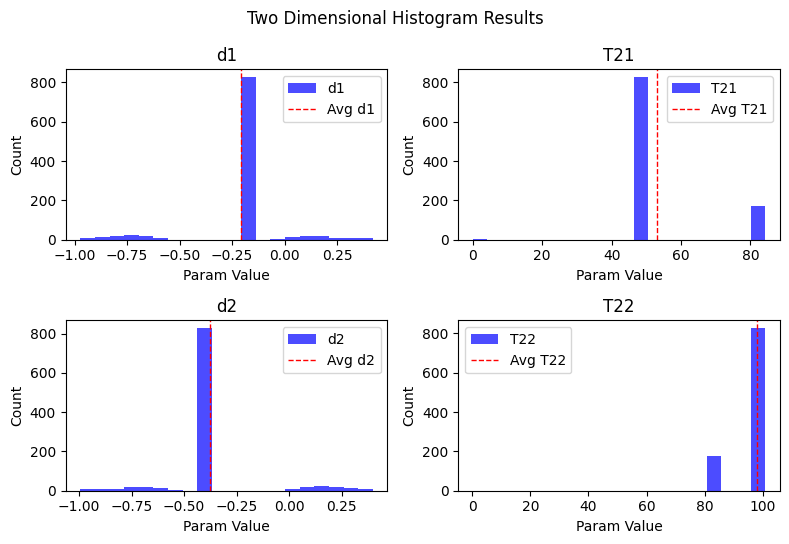

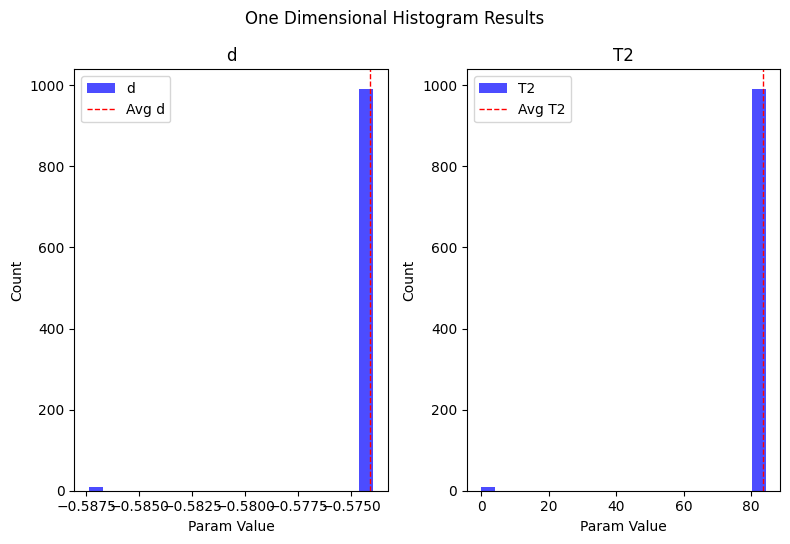

In [13]:
def get_hist_index(param_label):
    if param_label[-1] == '2':
        row = 1
    else:
        row = 0

    if param_label[0] == "T":
        col = 1
    else:
        col = 0

    return row, col

fig, ax = plt.subplots(2, 2, figsize=(8,5.5), tight_layout=True)
fig.suptitle("Two Dimensional Histogram Results")

labels = ['d1','d2','T21','T22']

for ii in range(param_biX_list.shape[-1]):

    row, col = get_hist_index(labels[ii])
    #Construct a nice figure of each of the two 
    ax[row, col].hist(x=param_biX_list[:,ii], bins=20, color='b', label = labels[ii], alpha = 0.7)
    ax[row, col].set_xlabel('Param Value')
    ax[row, col].set_ylabel('Count')
    ax[row, col].axvline(x=np.mean(param_biX_list[:,ii]), linewidth=1, label= 'Avg ' + labels[ii], color='red', ls = "--")
    ax[row, col].legend()
    ax[row, col].set_title(labels[ii])
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(8,5.5), tight_layout=True)
fig.suptitle("One Dimensional Histogram Results")

labels = ['d', 'T2']

for ii in range(param_moX_list.shape[-1]):

    _, col = get_hist_index(labels[ii])
    #Construct a nice figure of each of the two 
    ax[col].hist(x=param_moX_list[:,ii], bins=20, color='b', label = labels[ii], alpha = 0.7)
    ax[col].set_xlabel('Param Value')
    ax[col].set_ylabel('Count')
    ax[col].axvline(x=np.mean(param_moX_list[:,ii]), linewidth=1, label= 'Avg ' + labels[ii], color='red', ls = "--")
    ax[col].legend()
    ax[col].set_title(labels[ii])
plt.show()

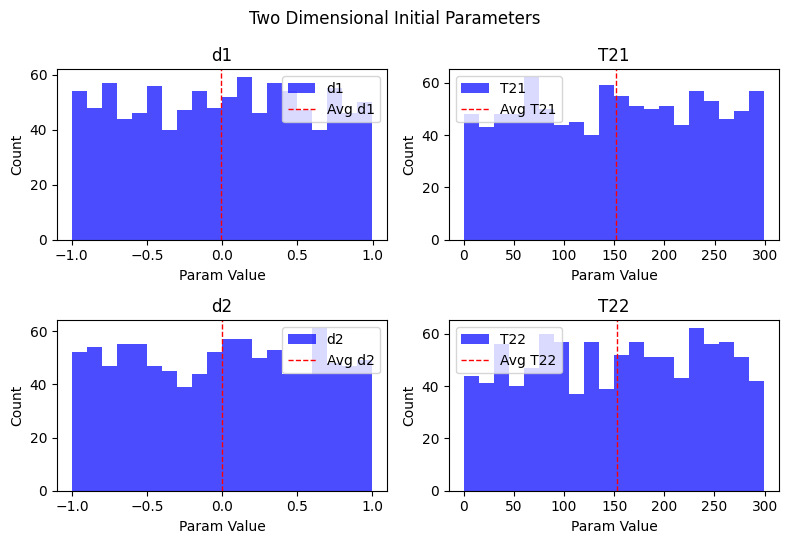

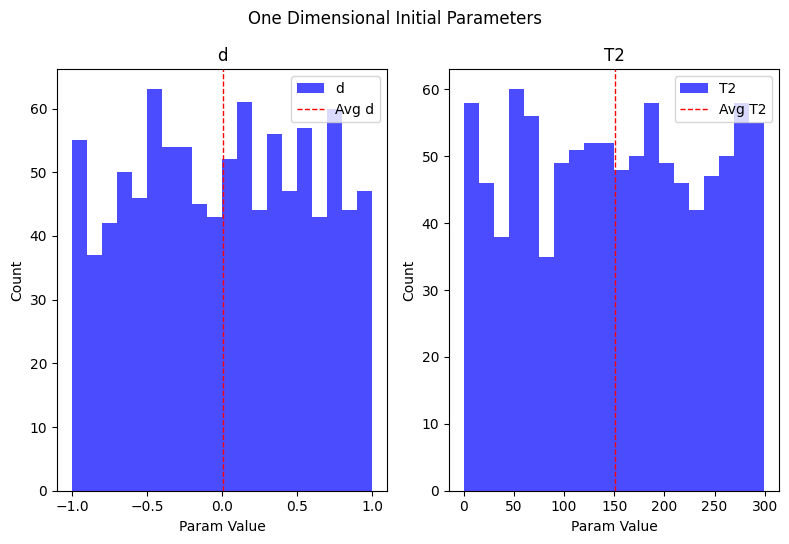

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(8,5.5), tight_layout=True)
fig.suptitle("Two Dimensional Initial Parameters")

labels = ['d1','d2','T21','T22']

for ii in range(init_p_biX_list.shape[-1]):

    row, col = get_hist_index(labels[ii])
    #Construct a nice figure of each of the two 
    ax[row, col].hist(x=init_p_biX_list[:,ii], bins=20, color='b', label = labels[ii], alpha = 0.7)
    ax[row, col].set_xlabel('Param Value')
    ax[row, col].set_ylabel('Count')
    ax[row, col].axvline(x=np.mean(init_p_biX_list[:,ii]), linewidth=1, label= 'Avg ' + labels[ii], color='red', ls = "--")
    ax[row, col].legend()
    ax[row, col].set_title(labels[ii])
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(8,5.5), tight_layout=True)
fig.suptitle("One Dimensional Initial Parameters")

labels = ['d', 'T2']

for ii in range(init_p_moX_list.shape[-1]):

    _, col = get_hist_index(labels[ii])
    #Construct a nice figure of each of the two 
    ax[col].hist(x=init_p_moX_list[:,ii], bins=20, color='b', label = labels[ii], alpha = 0.7)
    ax[col].set_xlabel('Param Value')
    ax[col].set_ylabel('Count')
    ax[col].axvline(x=np.mean(init_p_moX_list[:,ii]), linewidth=1, label= 'Avg ' + labels[ii], color='red', ls = "--")
    ax[col].legend()
    ax[col].set_title(labels[ii])
plt.show()